# Handwritten digits classification using neural network

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np



In [2]:

(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:

len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:

X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

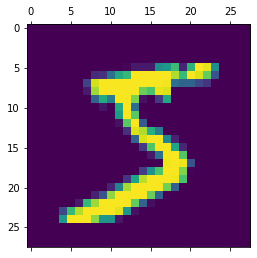

In [7]:
plt.matshow(X_train[0])

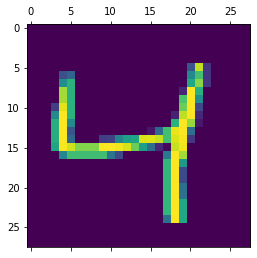

In [8]:
plt.matshow(X_train[2])

In [9]:

y_train[0]


5

In [10]:
y_train[2]

4

In [11]:
# scaling done bcz accuracy is going very low

X_train = X_train / 255
X_test = X_test / 255


In [12]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [13]:
X_train.shape

(60000, 28, 28)

In [38]:
# 28 x 28 grid ie 2D array to 1D array 


X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_train_flattened.shape

(60000, 784)

In [39]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

### neural network with no hidden layers

In [42]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [43]:
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4716 - accuracy: 0.8764
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3042 - accuracy: 0.9142
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2837 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2732 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2665 - accuracy: 0.9255


In [44]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2677 - accuracy: 0.9256


[0.2677079439163208, 0.925599992275238]

In [45]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]


313/313 [==============================] - 1s 2ms/step


array([1.3023242e-02, 3.0144008e-07, 5.8290016e-02, 9.2131555e-01,
       1.9776116e-03, 1.0942810e-01, 1.2885672e-06, 9.9973977e-01,
       8.4999859e-02, 6.0659426e-01], dtype=float32)

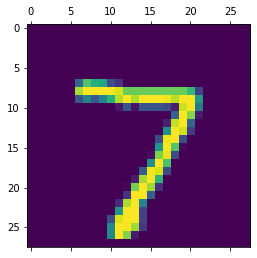

In [46]:
plt.matshow(X_test[0])

In [47]:
# np.argmax finds a maximum element from an array and returns the index of it

np.argmax(y_predicted[0])


7

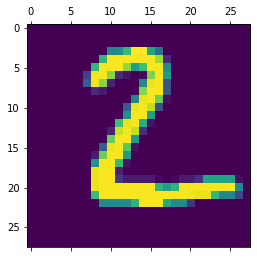

In [48]:
plt.matshow(X_test[1])

In [49]:
np.argmax(y_predicted[1])

2

In [50]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[0:5]

[7, 2, 1, 0, 4]

In [51]:
y_test[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [52]:
# confusion matrix
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 951,    0,    2,    2,    0,    7,   11,    3,    3,    1],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   3,   10,  921,   16,    8,    5,   13,    9,   44,    3],
       [   2,    1,   19,  900,    0,   37,    3,   13,   28,    7],
       [   1,    1,    2,    1,  907,    0,   12,    4,   10,   44],
       [   6,    3,    1,   18,    7,  796,   16,    6,   33,    6],
       [   7,    3,    5,    1,    8,   15,  914,    2,    3,    0],
       [   1,    5,   23,    2,    7,    0,    0,  955,    4,   31],
       [   4,    9,    5,   15,    9,   29,    8,   12,  878,    5],
       [   8,    7,    1,    8,   19,    9,    0,   24,   12,  921]])>

Text(69.0, 0.5, 'Truth')

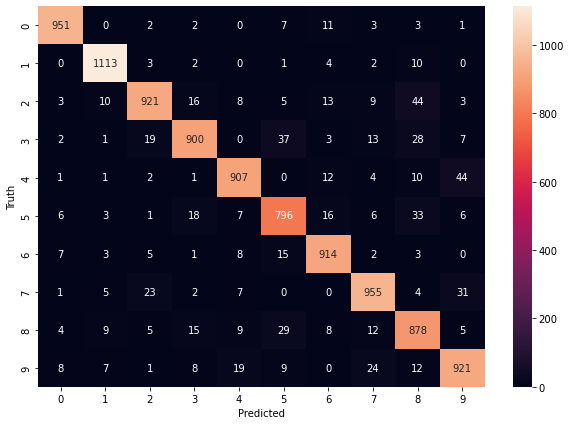

In [53]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


### Neural network with hidden layer

In [54]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),  # 1 hidden layer 
    keras.layers.Dense(10, activation='sigmoid')                     # output layer
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattend, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2751 - accuracy: 0.9220
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1269 - accuracy: 0.9623
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0879 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0679 - accuracy: 0.9793
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0528 - accuracy: 0.9835


In [55]:
model.evaluate(X_test_flattened,y_test)


313/313 [==============================] - 1s 3ms/step - loss: 0.0795 - accuracy: 0.9763


[0.079461008310318, 0.9763000011444092]

313/313 [==============================] - 1s 3ms/step


Text(69.0, 0.5, 'Truth')

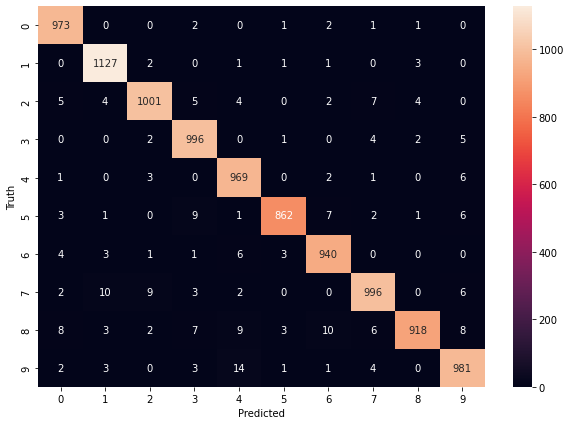

In [56]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


### Using Flatten layer so that we don't have to call reshape on input dataset

In [57]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2785 - accuracy: 0.9206
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1263 - accuracy: 0.9632
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0881 - accuracy: 0.9731
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0676 - accuracy: 0.9794
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0530 - accuracy: 0.9832
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0431 - accuracy: 0.9868
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0357 - accuracy: 0.9886
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0284 - accuracy: 0.9913
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0241 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.020

In [58]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0849 - accuracy: 0.9760


[0.08486652374267578, 0.9760000109672546]